In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 17s 4us/step


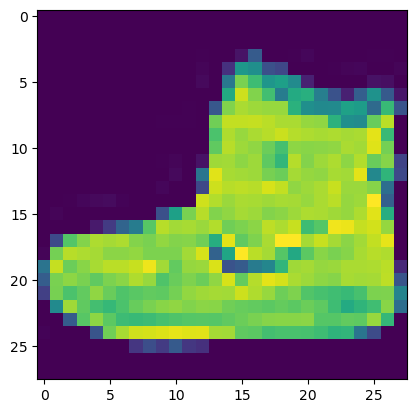

In [3]:
plt.imshow(x_train[1])
plt.imshow(x_train[0])

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
x_train.shape
(60000, 28, 28)
x_test.shape
(10000, 28, 28, 1)
y_train.shape
(60000,)
y_test.shape
(10000,)

(10000,)

In [6]:
model = keras.Sequential([
keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(64, (3,3), activation='relu'),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (3,3), activation='relu'),

keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),

keras.layers.Dropout(0.25),
keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [7]:
Model: "sequential"

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5725 - accuracy: 0.7864 - val_loss: 0.3725 - val_accuracy: 0.8627
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3660 - accuracy: 0.8671 - val_loss: 0.3223 - val_accuracy: 0.8783
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3162 - accuracy: 0.8840 - val_loss: 0.2916 - val_accuracy: 0.8918
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2895 - accuracy: 0.8932 - val_loss: 0.2693 - val_accuracy: 0.9019
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2741 - accuracy: 0.8991 - val_loss: 0.2649 - val_accuracy: 0.9027
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2616 - accuracy: 0.9027 - val_loss: 0.2602 - val_accuracy: 0.9038
Epoch 7/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2483 - accuracy: 0.9072 - val_loss: 0.2712 -